In [1]:
import pandas as pd 
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
data=pd.read_csv('VEN.csv')
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,"Venezuela, RB",VEN,"Intentional homicides, male (per 100,000 male)",VC.IHR.PSRC.MA.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,103.393110,NaN,NaN,97.677998,109.920478,93.877319,61.869646,NaN,NaN,NaN
1,"Venezuela, RB",VEN,Merchandise exports to low- and middle-income ...,TX.VAL.MRCH.R6.ZS,0.382196,0.623908,0.782309,0.782359,0.882126,0.572588,...,0.441976,0.096935,0.295279,0.314536,0.370122,0.343869,0.368030,NaN,NaN,NaN
2,"Venezuela, RB",VEN,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,NaN,NaN,0.022262,0.025381,0.021854,0.019341,...,0.000000,0.015282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Venezuela, RB",VEN,Merchandise imports from low- and middle-incom...,TM.VAL.MRCH.R3.ZS,1.996059,1.688538,2.441487,2.795812,2.961907,2.422574,...,25.361557,22.598997,29.809047,28.269397,27.076625,25.261749,25.262814,NaN,NaN,NaN
4,"Venezuela, RB",VEN,"Tariff rate, applied, weighted mean, primary p...",TM.TAX.TCOM.WM.AR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,11.240000,10.860000,8.840000,8.240000,8.340000,12.230000,7.820000,NaN,NaN,NaN


In [4]:
data=data.transpose()
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439
count,29.000000,48.000000,55.000000,63.000000,28.00,28.00,26.0,64.000000,64.000000,64.000000,...,54.0,4,4,13.000000,14,5.100000e+01,51.0,5.100000e+01,62.0,60.0
unique,29.000000,48.000000,55.000000,63.000000,28.00,28.00,26.0,64.000000,64.000000,64.000000,...,54.0,4,4,11.000000,14,5.100000e+01,50.0,5.000000e+01,5.0,52.0
top,35.696009,0.012746,0.022262,20.820124,12.65,7.87,469000000.0,50.225314,1.062561,3.569923,...,59385000.0,"Venezuela, RB","Venezuela, RB",29999.999329,"Venezuela, RB",1.771800e+10,3000000.0,4.898000e+09,882050.0,216000.0
freq,1.000000,1.000000,1.000000,1.000000,1.00,1.00,1.0,1.000000,1.000000,1.000000,...,1.0,1,1,2.000000,1,1.000000e+00,2.0,2.000000e+00,58.0,8.0


In [5]:
data=data.drop(['Country Name','Country Code','Indicator Code','Unnamed: 65','2019','2020'],axis=0)

In [6]:
pd.set_option('display.max_columns',None)

In [7]:
data=data.dropna(thresh=len(data)-8,axis=1)

In [8]:
data=data.reset_index(drop=False)

In [9]:
data.head()

,index,2,3,7,8,9,10,12,46,47,48,55,57,59,60,61,62,63,64,65,85,98,100,101,102,107,109,110,113,117,118,119,120,121,140,154,155,161,162,163,164,165,166,168,169,170,185,187,198,202,205,207,210,212,213,214,215,250,252,256,257,258,259,260,264,268,269,270,271,273,306,307,308,317,318,322,323,324,325,326,360,362,366,368,369,370,371,391,403,405,418,419,421,424,427,432,433,438,440,441,447,448,449,450,470,486,487,492,493,494,495,501,505,506,507,508,510,543,544,545,552,553,554,566,582,584,585,587,589,593,594,595,596,598,633,639,640,641,642,647,650,651,652,653,654,656,690,692,696,697,699,700,718,720,736,737,750,752,755,784,787,790,808,809,810,811,812,813,847,848,849,855,860,862,865,867,868,869,870,905,911,912,914,915,939,942,964,966,969,972,976,991,993,1007,1009,1010,1012,1013,1014,1019,1020,1021,1022,1042,1064,1065,1066,1067,1082,1100,1103,1104,1109,1110,1111,1112,1113,1133,1147,1148,1154,1155,1156,1158,1159,1161,1174,1175,1180,1183,1207,1215,1226,1244,1259,1260,1261,1266,1267,1268,1269,1303,1305,1309,1310,1311,1312,1313,1314,1317,1319,1322,1323,1324,1325,1326,1327,1360,1363,1369,1371,1372,1386,1391,1399,1405,1419,1420,1422,1428,1429,1438,1439
0,Indicator Name,Agricultural raw materials exports (% of merch...,Merchandise imports from low- and middle-incom...,"Population, male (% of total population)","Population ages 70-74, male (% of male populat...","Population ages 45-49, male (% of male populat...","Population ages 15-64, female (% of female pop...","Death rate, crude (per 1,000 people)",GNI (constant LCU),GDP per capita growth (annual %),Gross value added at basic prices (GVA) (const...,Merchandise exports (current US$),Manufactures imports (% of merchandise imports),Merchandise trade (% of GDP),Rural population growth (annual %),"Age dependency ratio, young (% of working-age ...","Population ages 65-69, male (% of male populat...","Population ages 25-29, male (% of male populat...",Population ages 0-14 (% of total population),"Life expectancy at birth, male (years)",Number of under-five deaths,DEC alternative conversion factor (LCU per US$),Gross domestic savings (% of GDP),GDP growth (annual %),"Inflation, GDP deflator (annual %)",Gross capital formation (constant 2010 US$),Households and NPISHs final consumption expend...,Merchandise exports to low- and middle-income ...,Agricultural raw materials imports (% of merch...,"Population ages 80 and above, female (% of fem...","Population ages 55-59, female (% of female pop...","Population ages 15-64, total","Population ages 0-14, female","Mortality rate, infant, female (per 1,000 live...","Mortality rate, under-5, male (per 1,000 live ...",Taxes less subsidies on products (constant LCU),"GNI per capita, Atlas method (current US$)","Manufacturing, value added (constant 2010 US$)",External balance on goods and services (curren...,Changes in inventories (current US$),Gross national expenditure (constant LCU),Households and NPISHs Final consumption expend...,Military expenditure (current USD),Gross fixed capital formation (current LCU),Final consumption expenditure (% of GDP),Households and NPISHs Final consumption expend...,Domestic credit to private sector by banks (% ...,Population density (people per sq. km of land ...,"Net bilateral aid flows from DAC donors, Germa...",Surface area (sq. km),Merchandise exports to low- and middle-income ...,Merchandise imports from economies in the Arab...,Urban population growth (annual %),"Population ages 65 and above, female (% of fem...","Population ages 30-34, male (% of male populat...","Population ages 05-09, male (% of male populat...","Survival to age 65, female (% of cohort)","GNI, Atlas method (current US$)",GDP deflator (base year varies by country),"Agriculture, forestry, and fishing, value adde...",Gross capital formation (constant LCU),Exports of goods and services (% of GDP),Final consumption expenditure (current LCU),General government final consumption expenditu...,Merchandise imports from low- and middle-incom...,"Population, female (

In [10]:
mapper={}
a=data.iloc[0]

In [11]:
for i,col in enumerate(data):
    mapper[col]=a[i]
data=data.rename(columns=mapper)

In [12]:
data=data.drop([0],axis=0)
data=data.reset_index(drop=True)

In [13]:
data=data.rename(columns={'Indicator Name':'Year'})
data.head()

,Year,Agricultural raw materials exports (% of merchandise exports),Agricultural raw materials exports (% of merchandise exports),Merchandise imports from low- and middle-income economies in Latin America & the Caribbean (% of total merchandise imports),"Population ages 70-74, male (% of male population)","Population ages 45-49, male (% of male population)","Population ages 15-64, female (% of female population)","Population, male (% of total population)","Population ages 70-74, male (% of male population)","Population ages 45-49, male (% of male population)","Population ages 15-64, female (% of female population)",Merchandise exports (current US$),"Death rate, crude (per 1,000 people)",Merchandise trade (% of GDP),Rural population growth (annual %),"Age dependency ratio, young (% of working-age population)","Population ages 65-69, male (% of male population)","Population ages 25-29, male (% of male population)",Population ages 0-14 (% of total population),"Life expectancy at birth, male (years)",Number of under-five deaths,DEC alternative conversion factor (LCU per US$),Gross domestic savings (% of GDP),GDP growth (annual %),"Inflation, GDP deflator (annual %)",Gross capital formation (constant 2010 US$),Households and NPISHs final consumption expenditure (% of GDP),Merchandise exports to low- and middle-income economies within region (% of total merchandise exports),Agricultural raw materials imports (% of merchandise imports),"Population ages 80 and above, female (% of female population)","Population ages 55-59, female (% of female population)","Population ages 15-64, total","Population ages 0-14, female","Mortality rate, infant, female (per 1,000 live births)","Mortality rate, under-5, male (per 1,000 live births)",Taxes less subsidies on products (constant LCU),"GNI per capita, Atlas method (current US$)","Manufacturing, value added (constant 2010 US$)",External balance on goods and services (current LCU),Changes in inventories (current US$),Gross national expenditure (constant LCU),Households and NPISHs Final consumption expenditure (constant LCU),Military expenditure (current USD),Gross fixed capital formation (current LCU),Final consumption expenditure (% of GDP),Households and NPISHs Final consumption expenditure (current US$),GNI (constant LCU),GDP per capita growth (annual %),Gross value added at basic prices (GVA) (constant 2010 US$),Surface area (sq. km),Merchandise exports to low- and middle-income economies outside region (% of total merchandise exports),Merchandise imports from economies in the Arab World (% of total merchandise imports),Urban population growth (annual %),"Population ages 65 and above, female (% of female population)","Population ages 30-34, male (% of male population)",Merchandise exports (current US$),"Survival to age 65, female (% of cohort)",Manufactures imports (% of merchandise imports),GDP deflator (base year varies by country),Merchandise trade (% of GDP),Rural population growth (annual %),"Age dependency ratio, young (% of working-age population)","Population ages 65-69, male (% of male population)","Population ages 25-29, male (% of male population)",Population ages 0-14 (% of total population),"Life expectancy at birth, male (years)",Population ages 65 and above (% of total population),"Population ages 40-44, male (% of male population)","Population ages 15-19, male (% of male population)","Mortality rate, adult, male (per 1,000 male adults)",Net primary income (Net income from abroad) (current US$),GNI (constant 2010 US$),GDP per capita (current LCU),"Merchandise imports by the reporting economy, residual (% of total merchandise imports)",Food imports (% of merchandise imports),"Population ages 80 and above, male (% of male population)","Population ages 55-59, male (% of male population)",Population ages 15-64 (% of total population),"Population ages 0-14, female (% of female population)","Mortality rate, infant (per 1,000 live births)",GNI per capita (current LCU),GDP (current US$)

In [14]:
data=data.astype(float)
data.fillna(method='ffill', inplace=True)

In [15]:
mapper={}
for x in data.columns:
#     print(x) 
    if x in mapper.keys():
        data.drop(x,axis=1,inplace=True)
    else:
        mapper[x]=1

In [16]:
data.drop(data.filter(regex='Population'),axis=1,inplace=True)
# data.drop(data.filter(regex='LCU'),axis=1,inplace=True)
data.drop(data.filter(regex='GNI'),axis=1,inplace=True)
data.drop(data.filter(regex='CO2'),axis=1,inplace=True)

In [17]:
data.head()

,Year,Merchandise imports from low- and middle-income economies in Latin America & the Caribbean (% of total merchandise imports),"Death rate, crude (per 1,000 people)",GDP per capita growth (annual %),Gross value added at basic prices (GVA) (constant 2010 US$),Manufactures imports (% of merchandise imports),"Mortality rate, adult, male (per 1,000 male adults)",Net primary income (Net income from abroad) (current US$),GDP per capita (current LCU),"Merchandise imports by the reporting economy, residual (% of total merchandise imports)",Food imports (% of merchandise imports),"Mortality rate, infant (per 1,000 live births)",GDP (current US$),"Manufacturing, value added (annual % growth)",Changes in inventories (current LCU),Gross national expenditure (% of GDP),Military expenditure (current LCU),Cereal yield (kg per hectare),General government final consumption expenditure (current LCU),Domestic credit to private sector (% of GDP),Claims on private sector (annual growth as % of broad money),Aquaculture production (metric tons),Net ODA received per capita (current US$),"Net bilateral aid flows from DAC donors, Japan (current US$)","Net bilateral aid flows from DAC donors, Belgium (current US$)",Arable land (hectares per person),Food exports (% of merchandise exports),"Mortality rate, under-5 (per 1,000 live births)",GDP per capita (constant LCU),Gross value added at basic prices (GVA) (constant LCU),Gross fixed capital formation (constant LCU),Merchandise imports from low- and middle-income economies in Europe & Central Asia (% of total merchandise imports),"Birth rate, crude (per 1,000 people)",Households and NPISHs Final consumption expenditure (current LCU),Broad money to total reserves ratio,"Technical cooperation grants (BoP, current US$)",Food production index (2004-2006 = 100),Permanent cropland (% of land area),Merchandise exports to low- and middle-income economies in Latin America & the Caribbean (% of total merchandise exports),Merchandise imports from low- and middle-income economies outside region (% of total merchandise imports),"Mortality rate, adult, female (per 1,000 female adults)",GDP per capita (current US$),Imports of goods and services (current LCU),Gross fixed capital formation (current US$),Final consumption expenditure (constant LCU),General government final consumption expenditure (% of GDP),Merchandise imports from high-income economies (% of total merchandise imports),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Discrepancy in expenditure estimate of GDP (current LCU),"Agriculture, forestry, and fishing, value added (constant LCU)",Imports of goods and services (current US$),Final consumption expenditure (annual % growth),General government final consumption expenditure (constant LCU),Broad money (current LCU),Capture fisheries production (metric tons),Total reserves minus gold (current US$),"Life expectancy at birth, total (years)",Gross capital formation (current LCU),Merchandise exports to low- and middle-income economies in East Asia & Pacific (% of total merchandise exports),Merchandise imports (current US$),Urban population,"Survival to age 65, male (% of cohort)","Agriculture, forestry, and fishing, value added (annual % growth)",Gross capital formation (% of GDP),Final consumption expenditure (constant 2010 US$),General government final consumption expenditure (annual % growth),Domestic credit to private sector by banks (% of GDP),Claims on central government (annual growth as % of broad money),Net official development assistance received (current US$),"Net bilateral aid flows from DAC donors, Total (current US$)",Broad money (% of GDP),Total fisheries production (metric tons),"Grants, excluding technical cooperation (BoP, current US$)",Crop production index (2004-2006 = 100),Land under cereal production (hectares),Merchandise exports by the reporting economy (current US$),Fuel exports (% of merchandise exports),"Net bilateral aid flows from DAC donors, Germany (current US$)"

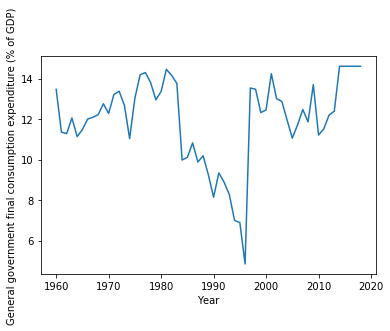

In [18]:
sns.lineplot(x=data['Year'],y=data['General government final consumption expenditure (% of GDP)'])

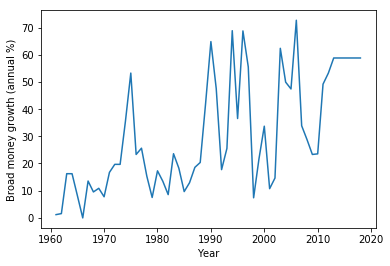

In [19]:
sns.lineplot(x=data['Year'],y=data['Broad money growth (annual %)'])

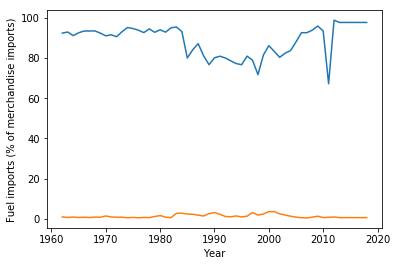

In [20]:
sns.lineplot(x=data['Year'],y=data['Fuel exports (% of merchandise exports)'])
sns.lineplot(x=data['Year'],y=data['Fuel imports (% of merchandise imports)'])

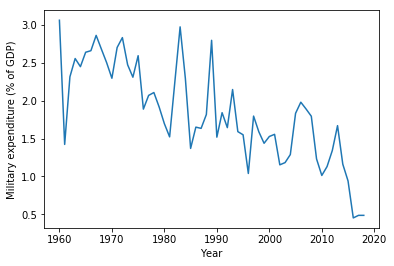

In [21]:
sns.lineplot(x=data['Year'],y=data['Military expenditure (% of GDP)'])
# data['Military expenditure (current USD)']

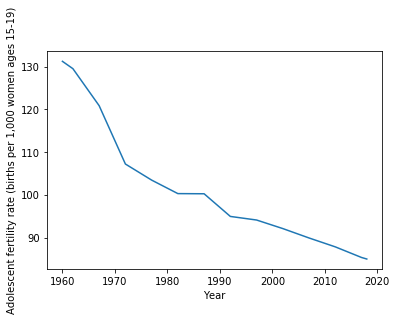

In [22]:
sns.lineplot(x=data['Year'],y=data['Adolescent fertility rate (births per 1,000 women ages 15-19)'])

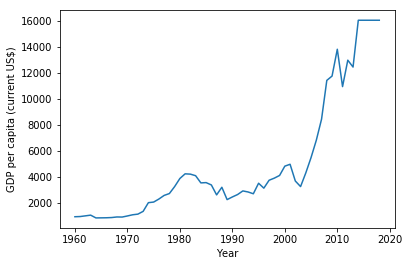

In [23]:
sns.lineplot(x=data['Year'],y=data['GDP per capita (current US$)'])

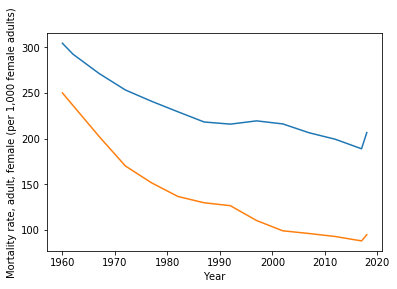

In [24]:
sns.lineplot(x=data['Year'],y=data['Mortality rate, adult, male (per 1,000 male adults)'])
sns.lineplot(x=data['Year'],y=data['Mortality rate, adult, female (per 1,000 female adults)'])

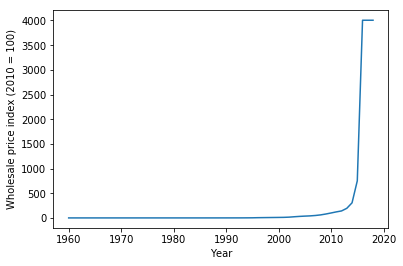

In [25]:
sns.lineplot(x=data['Year'],y=data['Wholesale price index (2010 = 100)'])

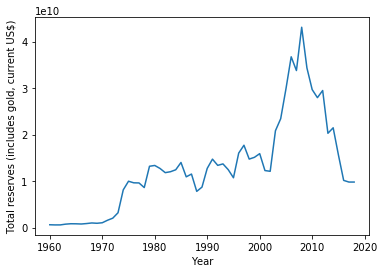

In [26]:
sns.lineplot(x=data['Year'],y=data['Total reserves (includes gold, current US$)'])

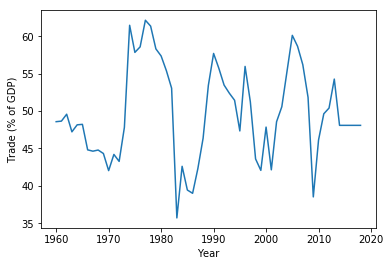

In [27]:
sns.lineplot(x=data['Year'],y=data['Trade (% of GDP)'])

In [28]:
data.filter(regex='LCU').head()

,GDP per capita (current LCU),Changes in inventories (current LCU),Military expenditure (current LCU),General government final consumption expenditure (current LCU),GDP per capita (constant LCU),Gross value added at basic prices (GVA) (constant LCU),Gross fixed capital formation (constant LCU),Households and NPISHs Final consumption expenditure (current LCU),Imports of goods and services (current LCU),Final consumption expenditure (constant LCU),Discrepancy in expenditure estimate of GDP (current LCU),"Agriculture, forestry, and fishing, value added (constant LCU)",General government final consumption expenditure (constant LCU),Broad money (current LCU),Gross capital formation (current LCU),Exports of goods and services (current LCU),Net foreign assets (current LCU),GDP (current LCU),"Manufacturing, value added (constant LCU)",Changes in inventories (constant LCU),Gross capital formation (constant LCU),Final consumption expenditure (current LCU),Net domestic credit (current LCU)
0,3.152972,150900.0,785000.0,3457000.0,1768.105850,1.350860e+10,4.560183e+09,16106700.0,4658900.0,NaN,-3353300.0,581768100.0,1.324450e+09,5265000.0,6306900.0,7812600.0,1890000.0,25671000.0,1.575846e+09,96653800.0,0.00335,NaN,4370000.0
1,3.202176,997600.0,384000.0,3067600.0,1760.251306,1.379825e+10,3.878911e+09,16593200.0,4577900.0,6.387368e+09,-3061200.0,585416400.0,1.310756e+09,5327000.0,6431500.0,8570800.0,1828000.0,27024000.0,1.674428e+09,367483400.0,0.00335,-2.547873,4602000.0
2,3.377073,1427000.0,683000.0,3330500.0,1844.128736,1.494916e+10,4.050012e+09,18201000.0,4990900.0,6.526435e+09,-3762100.0,615741000.0,1.282940e+09,5410000.0,7099100.0,9647400.0,1810000.0,29525000.0,1.832605e+09,494974400.0,0.00335,9.371318,4426000.0
3,3.555429,1278700.0,822000.0,3879700.0,1850.483213,1.543099e+10,4.156571e+09,19460000.0,4886700.0,6.870364e+09,-3771000.0,649995300.0,1.489632e+09,6288900.0,7191000.0,10313000.0,2130400.0,32186000.0,1.937439e+09,439157100.0,0.00335,-0.174513,4753820.0
4,3.803675,2884700.0,872000.0,3967000.0,1986.969618,1.778369e+10,4.997024e+09,21710500.0,6410400.0,7.455044e+09,-4722000.0,702215600.0,1.529429e+09,7310000.0,10339100.0,10752800.0,2778000.0,35637000.0,2.170284e+09,902316500.0,0.00435,35.503694,4882680.0


In [30]:
corr=data[['Trade (% of GDP)','Fuel exports (% of merchandise exports)', 'Broad money growth (annual %)',
            'Wholesale price index (2010 = 100)',
           'Total reserves (includes gold, current US$)',
           'General government final consumption expenditure (% of GDP)',
# #            'Mortality rate, adult, male (per 1,000 male adults)',
#           'Adolescent fertility rate (births per 1,000 women ages 15-19)
           ]]

In [31]:
corr1=corr[48:58]
corr2=corr[18:58]

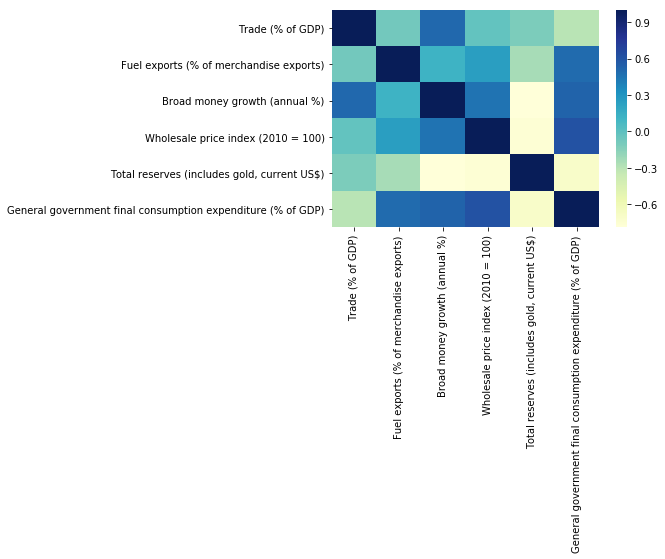

In [36]:
sns.heatmap(corr1.corr(), cmap="YlGnBu")

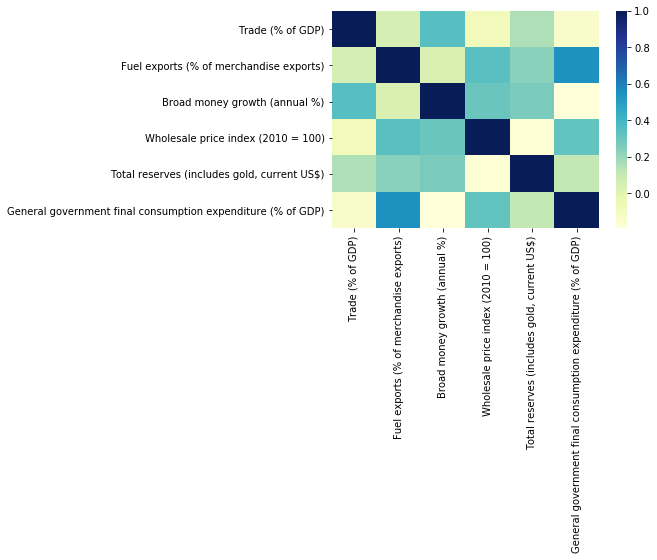

In [37]:
sns.heatmap(corr2.corr(), cmap="YlGnBu")